<a href="https://colab.research.google.com/github/dsharma-memphis/DataMiningProject/blob/main/Datamining_Finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path_to_file ="/content/Breast cancer.csv"

In [ ]:
# importing all the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Gets the dataset as a DataFrame
df= pd.read_csv(path_to_file)

In [ ]:
print("Shape of the data: ", df.shape)
df.head()

Shape of the data:  (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# checking the data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Counting values of B and M
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
# dropping the Unnamed: 32 column since all the values are empty
df = df.drop(['Unnamed: 32'], axis=1)

# checking sum of null values 
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# encoding categorical variables on diagnosis column
print("unique values", df['diagnosis'].unique())
print("before encoding -->")
print(df['diagnosis'].tail())

enc = LabelEncoder()
df['diagnosis'] = enc.fit_transform(df['diagnosis'])

print("after encoding -->")
print(df['diagnosis'].tail())

unique values ['M' 'B']
before encoding -->
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, dtype: object
after encoding -->
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, dtype: int64


In [ ]:
# Counting values of B and M
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


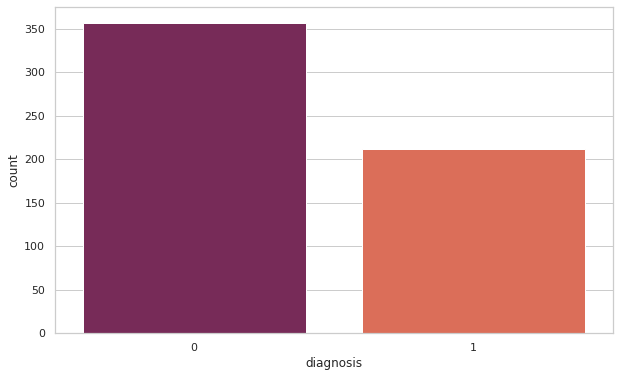

In [ ]:
#vistualize the count
#sns.countplot(df['diagnosis'],label='count')

#We want to see how much data is benign and how much is malignant
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(df['diagnosis'],label='count',x="diagnosis",  palette='rocket');

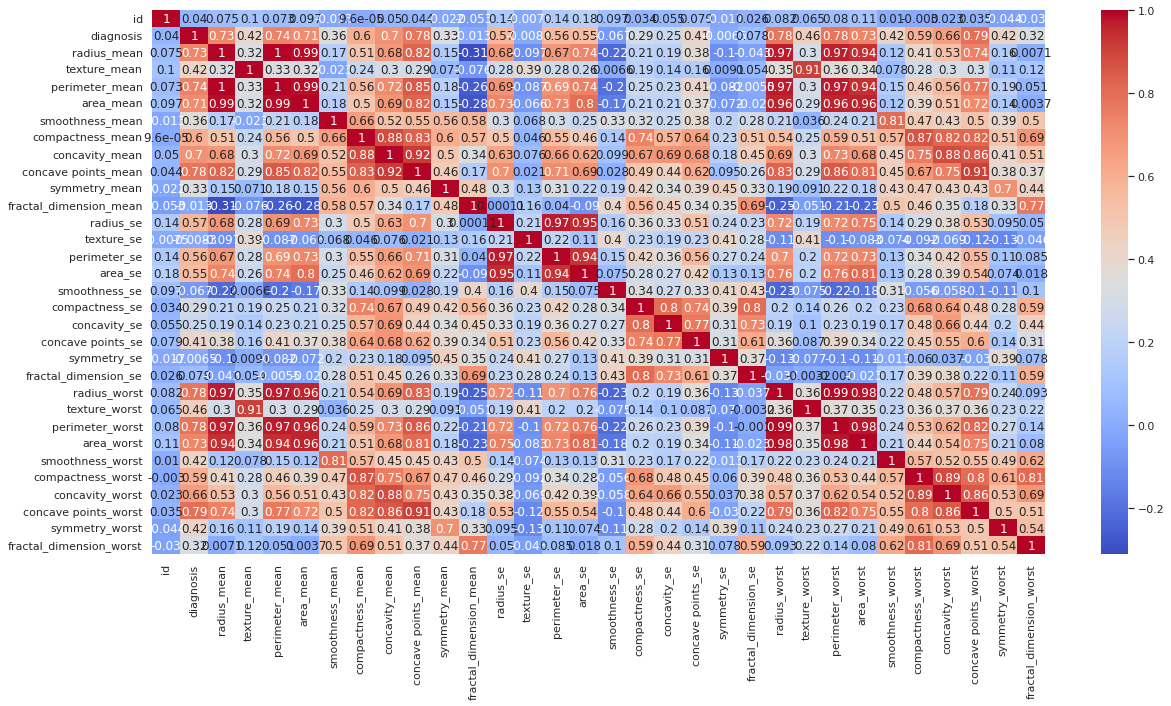

In [ ]:
# used Corr() function  to find correlation between all features
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

In [ ]:
# Determine correlation threshold for data
corr[abs(corr['diagnosis']) > 0.75].index

Index(['diagnosis', 'concave points_mean', 'radius_worst', 'perimeter_worst',
       'concave points_worst'],
      dtype='object')

In [ ]:
df = df[['diagnosis', 'concave points_mean', 'radius_worst', 'perimeter_worst',
       'concave points_worst']]

In [ ]:
# Printing shape and values of data after thresholding
print(df.shape)
df.head()

(569, 5)


,diagnosis,concave points_mean,radius_worst,perimeter_worst,concave points_worst
0,1,0.14710,25.38,184.60,0.2654
1,1,0.07017,24.99,158.80,0.1860
2,1,0.12790,23.57,152.50,0.2430
3,1,0.10520,14.91,98.87,0.2575
4,1,0.10430,22.54,152.20,0.1625


In [ ]:
# Allocating coloumn and values to x and y
x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [ ]:
#Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test = train_test_split( x, y, test_size =0.33, random_state =42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train.values.ravel())
y_pred = model.predict(x_test)
log_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using logistic regression: ", log_accuracy)

Accuracy using logistic regression:  0.9308510638297872


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       121
           1       0.90      0.91      0.90        67

    accuracy                           0.93       188
   macro avg       0.92      0.93      0.92       188
weighted avg       0.93      0.93      0.93       188

[[114   7]
 [  6  61]]


In [ ]:
# Random forest Algorithm to the Training Set
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using Random forest: ", rf_accuracy)

Accuracy using Random forest:  0.9574468085106383


In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       121
           1       0.95      0.93      0.94        67

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188

[[118   3]
 [  5  62]]


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(7), activation="relu", random_state=1, max_iter=10000)

mlp_clf.fit(x_train, y_train.values.ravel())

#print("Training accuracy of the model is", (mlp_clf.score(x_train, y_train)))
nn_accuracy = mlp_clf.score(x_test, y_test)
print("Testing accuracy of the model is", nn_accuracy)

Testing accuracy of the model is 0.6436170212765957


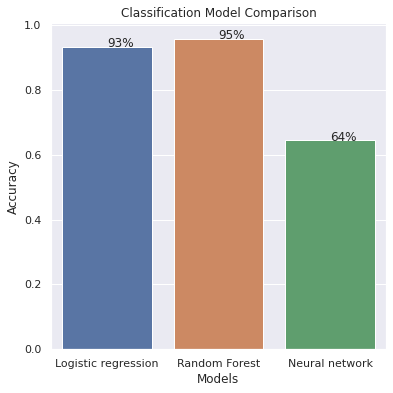

In [ ]:
# plotting bar chart
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(6,6)})

ax = sns.barplot(x=['Logistic regression', 'Random Forest' , 'Neural network'], y=[log_accuracy, rf_accuracy, nn_accuracy])
ax.set(xlabel='Models', ylabel='Accuracy', title='Classification Model Comparison')

a = int(log_accuracy * 100)
b = int(rf_accuracy * 100)
c = int(nn_accuracy * 100)
ax.text(0, log_accuracy, str(a)+'%')
ax.text(1, rf_accuracy, str(b)+'%')
ax.text(2, nn_accuracy, str(c)+'%')
plt.show()

In [ ]:
# Performing dimensionality reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(x_train)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

print(x_train_pca)
sum(pca.explained_variance_ratio_)

[[ 1.76703733e+01  3.82876163e-02  5.36848912e-02  2.50352495e-02]
 [-1.59848383e+01 -3.77982064e-01 -2.47102166e-02 -3.00194978e-04]
 [ 6.33575282e+01 -8.06928788e-01  1.60113945e-02 -1.56106702e-02]
 ...
 [-1.31308806e+01 -4.82989994e-01 -5.21674837e-02 -3.93259908e-03]
 [ 6.43423567e+00  1.87456491e-01  5.20219199e-02 -1.35464013e-02]
 [-2.31139074e+01 -3.33265902e-01  3.19245219e-03 -5.97326787e-03]]


1.0

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)

log_model.fit(x_train_pca, y_train.values.ravel())
                            
print("Training accuracy of the model is", (log_model.score(x_train_pca, y_train)))
pca_log_accuracy = log_model.score(x_test_pca, y_test)
print("Testing accuracy of the model is", pca_log_accuracy)

Training accuracy of the model is 0.9028871391076115
Testing accuracy of the model is 0.9361702127659575


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50)

rf_model.fit(x_train_pca, y_train.values.ravel())
                            
#print("Training accuracy of the model is", (rf_model.score(x_train_pca, y_train)))
pca_rf_accuracy = rf_model.score(x_test_pca, y_test)
print("Testing accuracy of the model is", pca_rf_accuracy)


Testing accuracy of the model is 0.9414893617021277


In [ ]:
from sklearn.neural_network import MLPClassifier
mlpc_model = MLPClassifier(hidden_layer_sizes=(7), activation="relu", random_state=1, max_iter=10000)

mlpc_model.fit(x_train_pca, y_train.values.ravel())

print("Training accuracy of the model is", (mlpc_model.score(x_train_pca, y_train)))
pca_nn_accuracy = mlpc_model.score(x_test_pca, y_test)
print("Testing accuracy of the model is", pca_nn_accuracy)

Training accuracy of the model is 0.905511811023622
Testing accuracy of the model is 0.9361702127659575


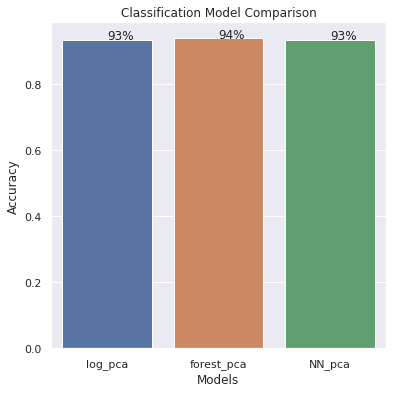

In [ ]:
# plotting bar chart for models with pca
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(6,6)})

ax = sns.barplot(x=['log_pca', 'forest_pca', 'NN_pca'], y=[pca_log_accuracy, pca_rf_accuracy, pca_nn_accuracy])
ax.set(xlabel='Models', ylabel='Accuracy', title='Classification Model Comparison')

a = int(pca_log_accuracy * 100)
b = int(pca_rf_accuracy* 100)
c = int(pca_nn_accuracy* 100)
ax.text(0, pca_log_accuracy, str(a)+'%')
ax.text(1, pca_rf_accuracy, str(b)+'%')
ax.text(2, pca_nn_accuracy, str(c)+'%')
plt.show()

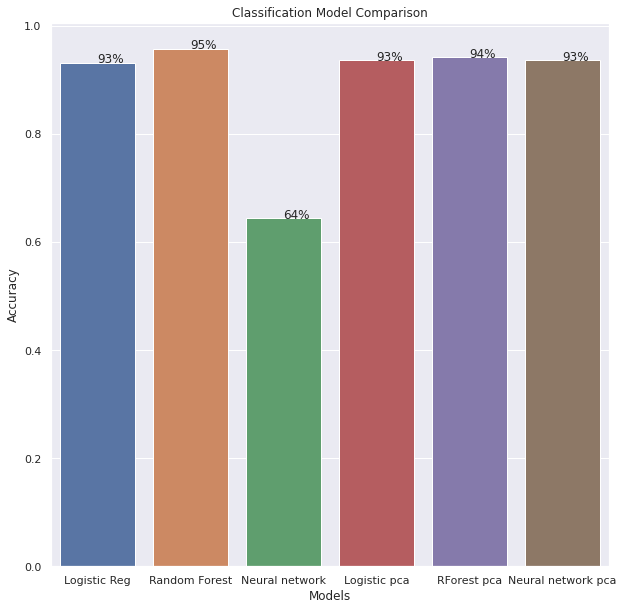

In [ ]:
# plotting bar chart
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,10)})

ax = sns.barplot(x=['Logistic Reg', 'Random Forest' , 'Neural network', 'Logistic pca', 'RForest pca', 'Neural network pca'], y=[log_accuracy, rf_accuracy, nn_accuracy, pca_log_accuracy, pca_rf_accuracy, pca_nn_accuracy])
ax.set(xlabel='Models', ylabel='Accuracy', title='Classification Model Comparison')

a = int(log_accuracy * 100)
b = int(rf_accuracy * 100)
c = int(nn_accuracy * 100)
x = int(pca_log_accuracy * 100)
y = int(pca_rf_accuracy * 100)
z = int(pca_nn_accuracy * 100)
ax.text(0, log_accuracy, str(a)+'%')
ax.text(1, rf_accuracy, str(b)+'%')
ax.text(2, nn_accuracy, str(c)+'%')
ax.text(3, pca_log_accuracy, str(x)+'%')
ax.text(4, pca_rf_accuracy, str(y)+'%')
ax.text(5, pca_nn_accuracy, str(z)+'%')

plt.show()